In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv
/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/test.csv


# **Library**

In [4]:
%pip list

Package                   Version
------------------------- ---------------
aiohappyeyeballs          2.6.1
aiohttp                   3.13.2
aiosignal                 1.4.0
annotated-types           0.7.0
anyio                     4.12.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.4.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.4.0
autogluon.common          1.5.0
autogluon.core            1.5.0
autogluon.features        1.5.0
autogluon.tabular         1.5.0
babel                     2.17.0
beartype                  0.22.8
beautifulsoup4            4.14.3
black                     25.12.0
bleach                    6.3.0
blis                      1.3.3
boto3                     1.42.28
botocore                  1.42.28
capstone                  5.0.6
catalogue                 2.0.10
certifi                   2025.11.12
cffi                      2.0.0
charset-normalizer        3.4.4
click   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from autogluon.tabular import TabularPredictor
warnings.filterwarnings("ignore")

# **Explore Data**

In [ ]:
train_df = pd.read_csv("train.csv")
train_df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [ ]:
test_df = pd.read_csv("test.csv")
test_df.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [12]:
train_df['var_0'].value_counts()

var_0
13.0656    11
8.6649     11
10.6829    11
9.5114     10
10.9468    10
           ..
9.1800      1
7.3502      1
11.5106     1
14.5987     1
14.1869     1
Name: count, Length: 94672, dtype: int64

# **Analyze Data**

## **Distribution**

In [13]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.kdeplot(df1[feature],label=label1)
        sns.kdeplot(df2[feature],label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
        plt.legend()
    plt.show()

### Data 0,1

<Figure size 640x480 with 0 Axes>

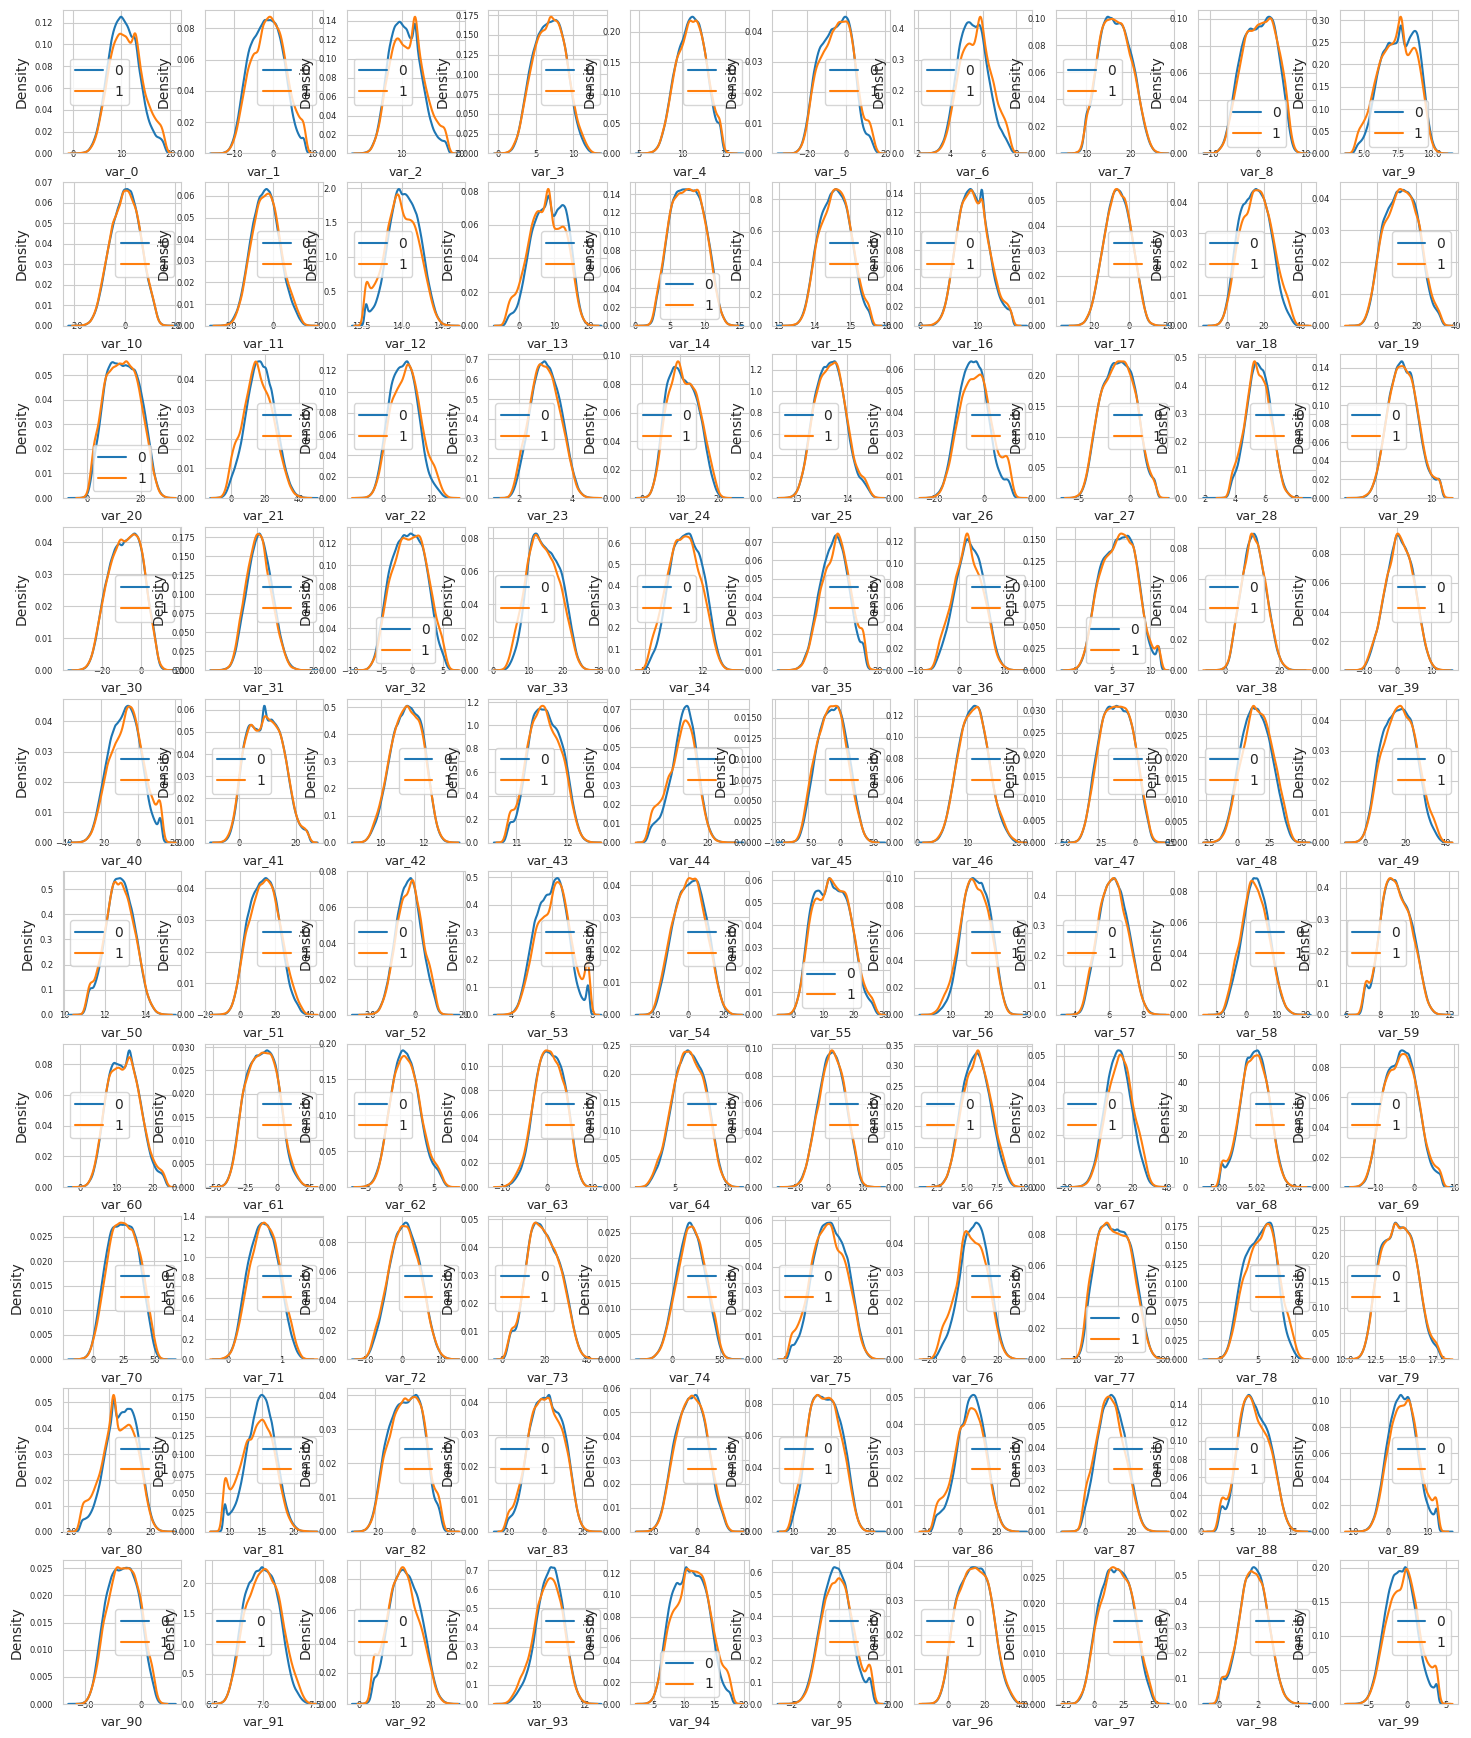

In [14]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
features = train_df.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 640x480 with 0 Axes>

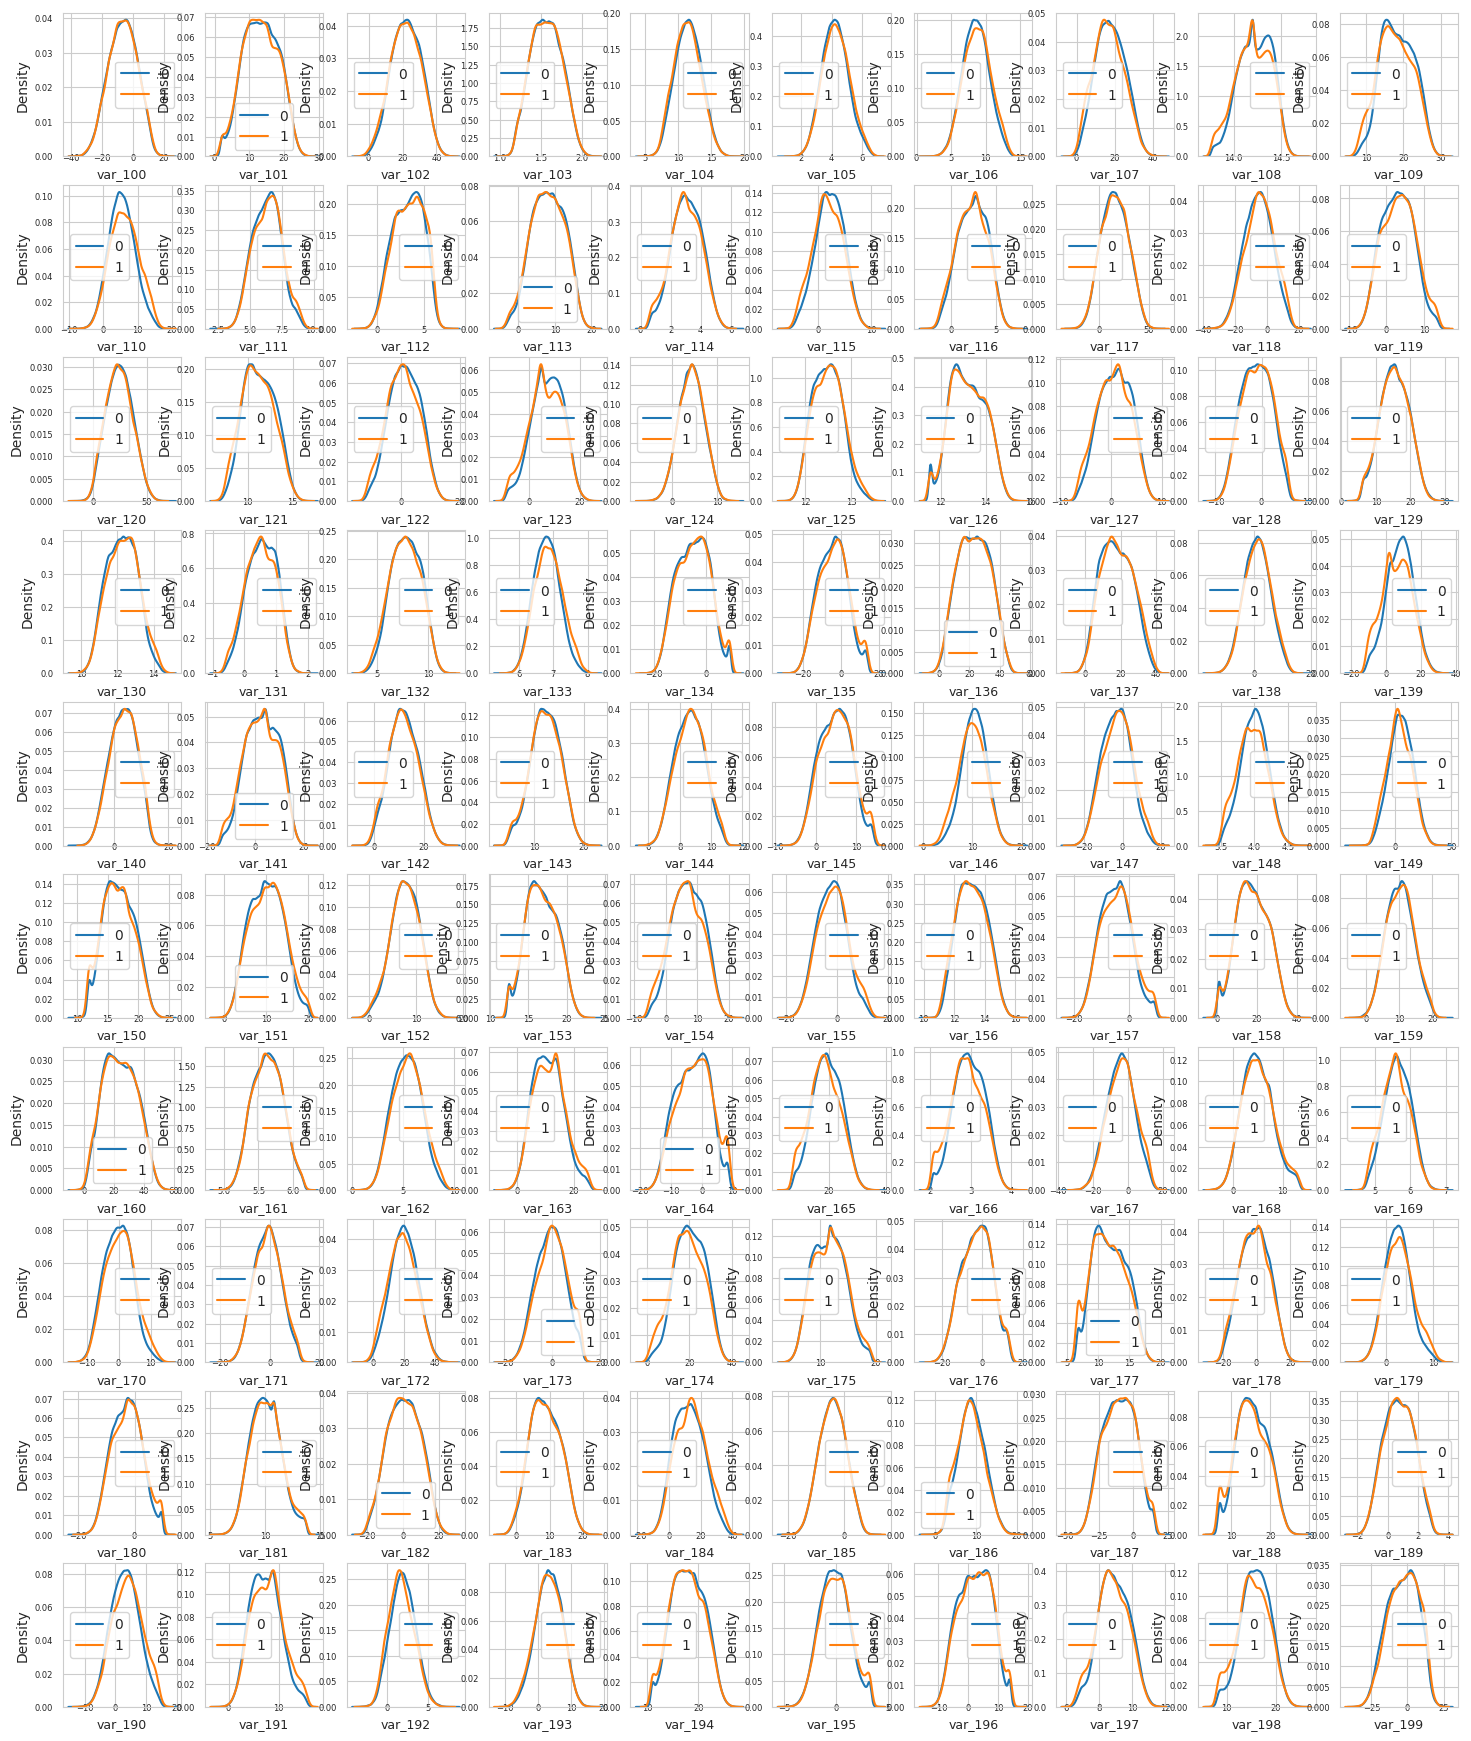

In [15]:
features = train_df.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

### Data train,test

<Figure size 640x480 with 0 Axes>

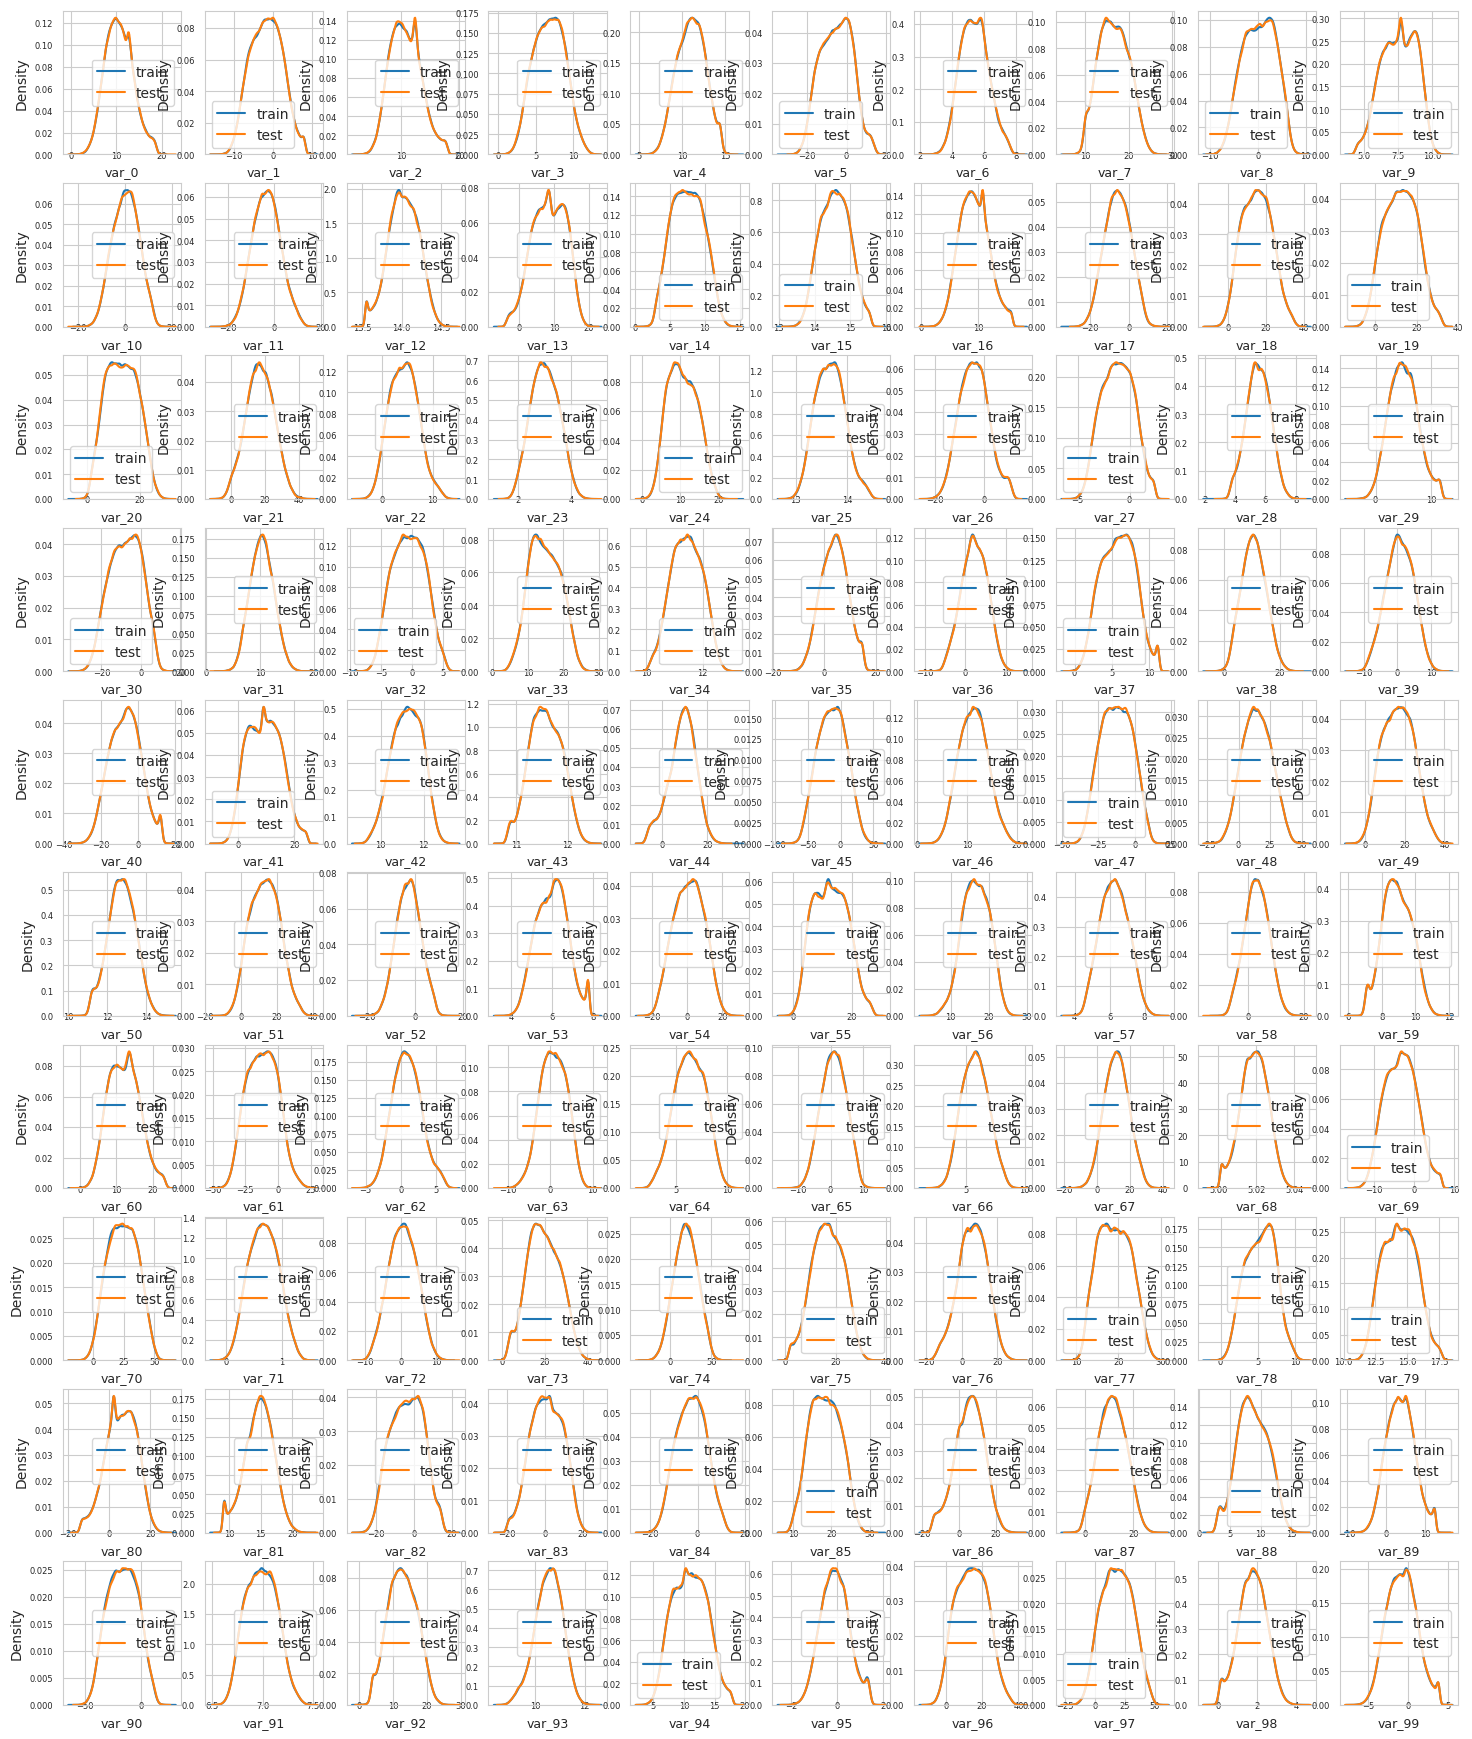

In [16]:
features = train_df.columns.values[2:102]
plot_feature_distribution(train_df, test_df, 'train', 'test', features)

<Figure size 640x480 with 0 Axes>

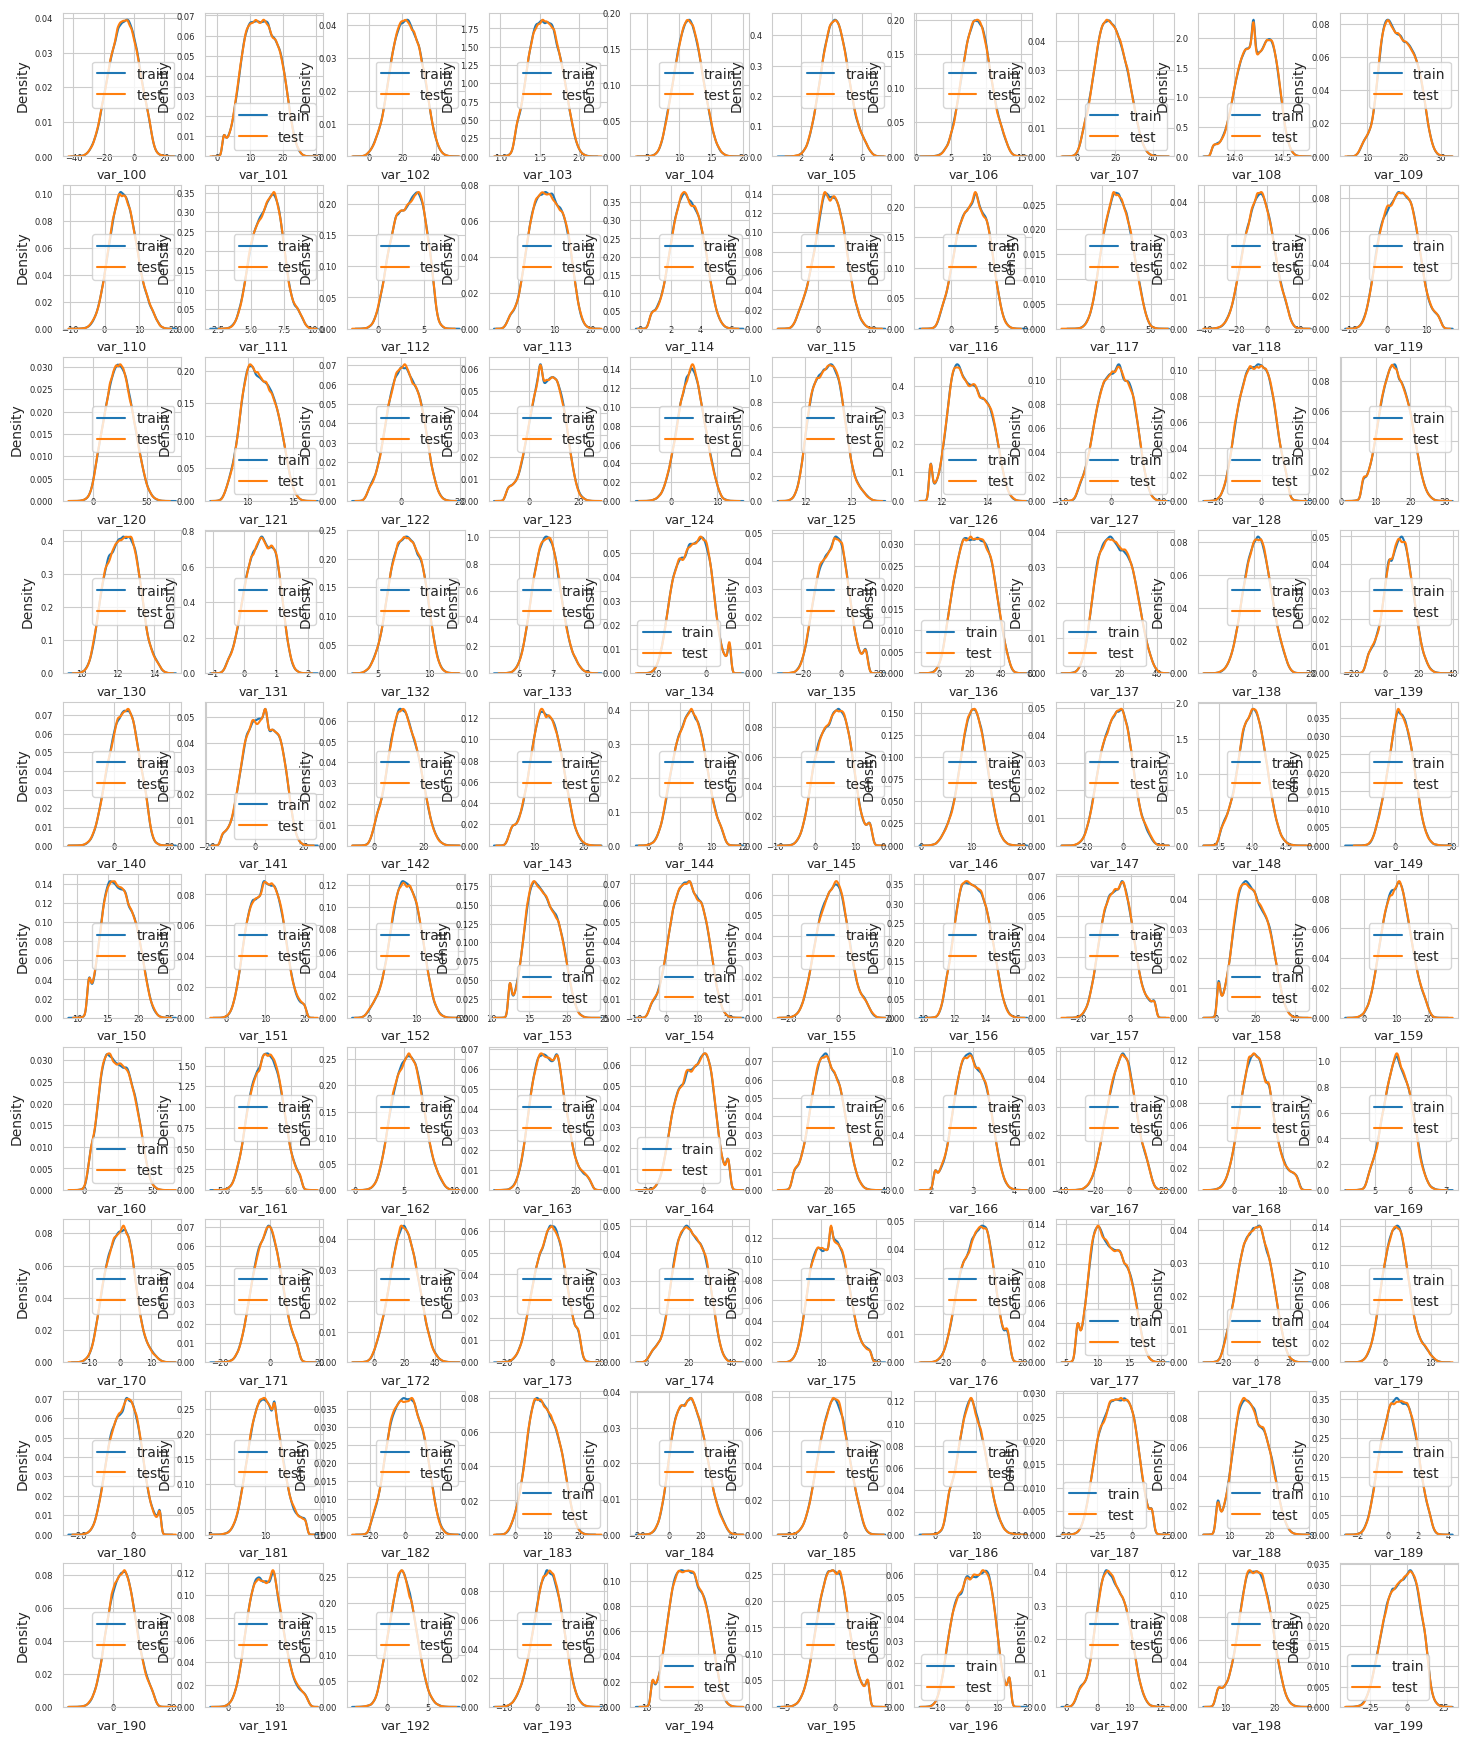

In [17]:
features = train_df.columns.values[102:202]
plot_feature_distribution(train_df, test_df, 'train', 'test', features)

### Mean

<Figure size 640x480 with 0 Axes>

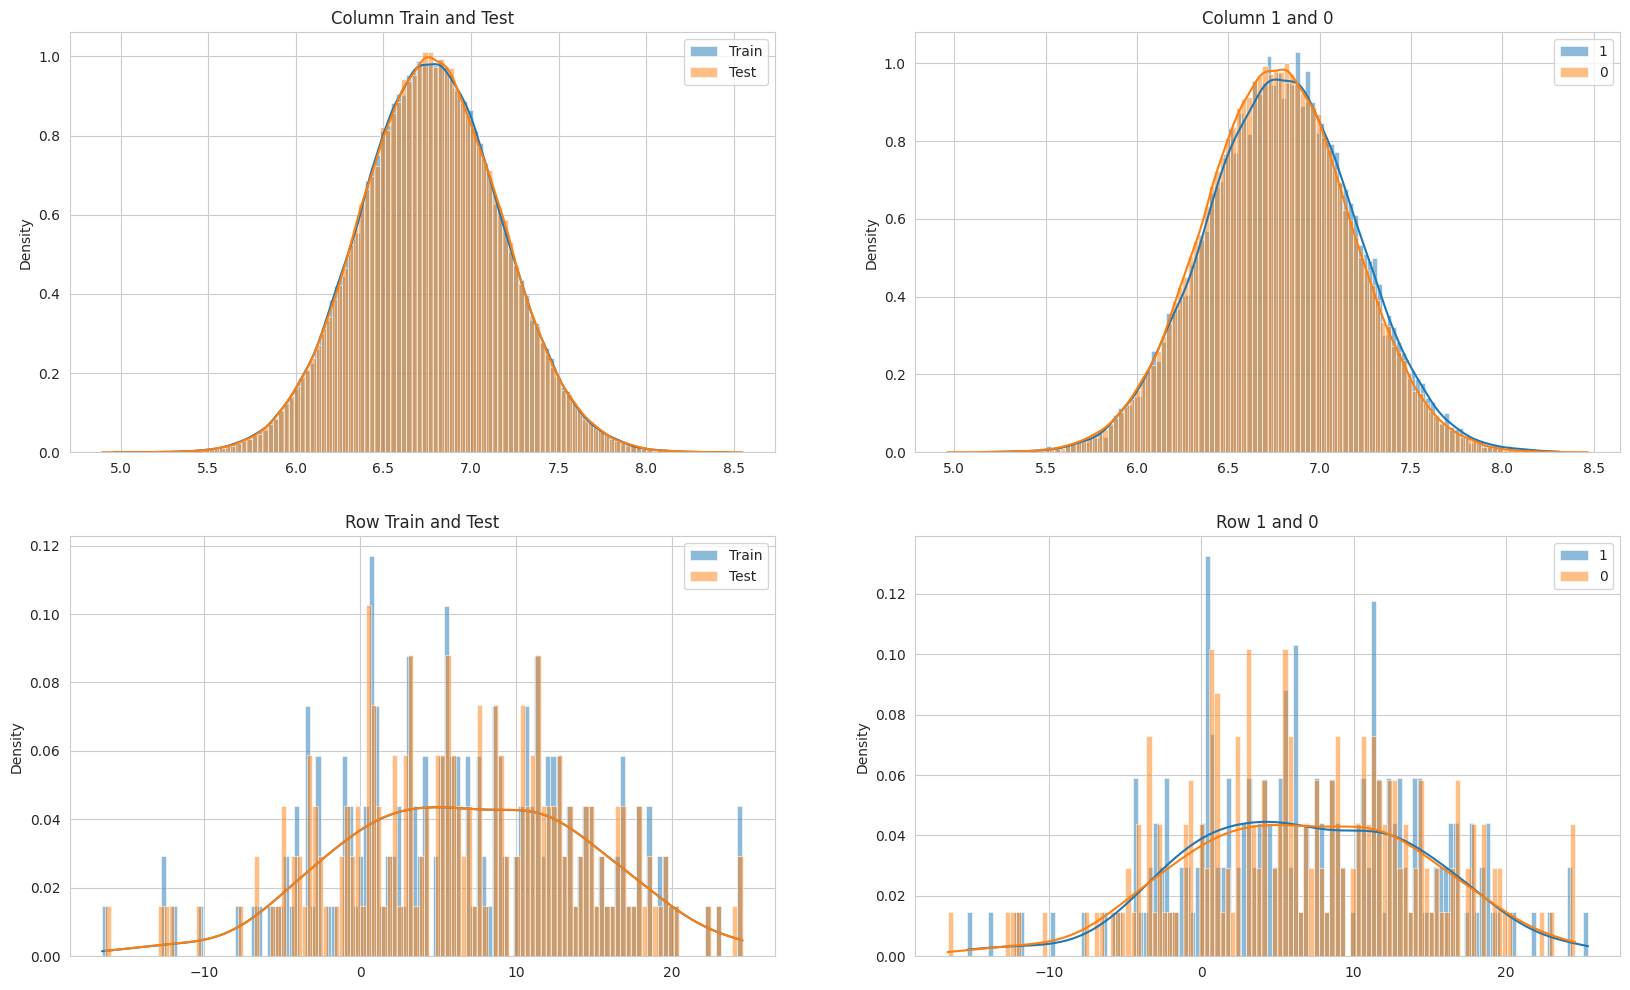

In [18]:
plt.figure()
fig,ax = plt.subplots(2,2,figsize=(20,12))
features = train_df.columns.values[2:202]
plt.subplot(2,2,1)
plt.title('Column Train and Test')
sns.histplot(data = train_df[features].mean(axis = 1), label = 'Train', kde = True,bins=120,stat="density")
sns.histplot(data = test_df[features].mean(axis = 1), label = 'Test', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,2)
plt.title('Column 1 and 0')
sns.histplot(data = t1[features].mean(axis = 1), label = '1', kde = True,bins=120,stat="density")
sns.histplot(data = t0[features].mean(axis = 1), label = '0', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,3)
plt.title('Row Train and Test')
sns.histplot(data = train_df[features].mean(axis = 0), label = 'Train', kde = True,bins=120,stat="density")
sns.histplot(data = test_df[features].mean(axis = 0), label = 'Test', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,4)
plt.title('Row 1 and 0')
sns.histplot(data = t1[features].mean(axis = 0), label = '1', kde = True,bins=120,stat="density")
sns.histplot(data = t0[features].mean(axis = 0), label = '0', kde = True,bins=120,stat="density")
plt.legend()
plt.show()

### Standard deviation

<Figure size 640x480 with 0 Axes>

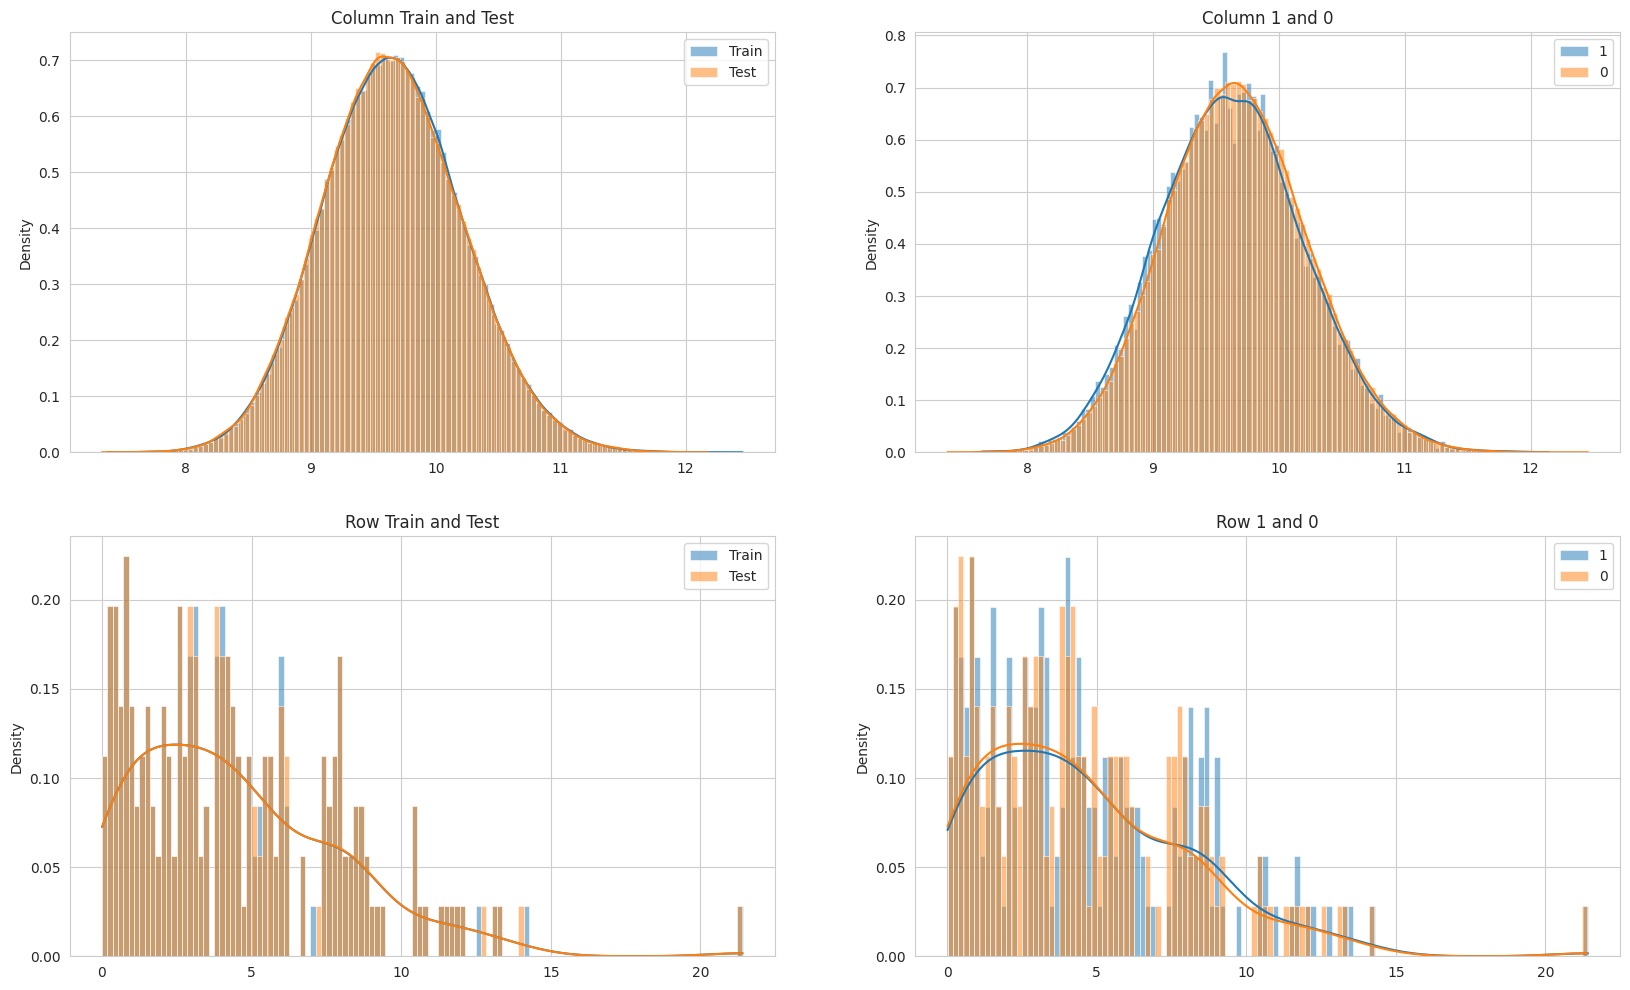

In [19]:
plt.figure()
fig,ax = plt.subplots(2,2,figsize=(20,12))
features = train_df.columns.values[2:202]
plt.subplot(2,2,1)
plt.title('Column Train and Test')
sns.histplot(data = train_df[features].std(axis = 1), label = 'Train', kde = True,bins=120,stat="density")
sns.histplot(data = test_df[features].std(axis = 1), label = 'Test', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,2)
plt.title('Column 1 and 0')
sns.histplot(data = t1[features].std(axis = 1), label = '1', kde = True,bins=120,stat="density")
sns.histplot(data = t0[features].std(axis = 1), label = '0', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,3)
plt.title('Row Train and Test')
sns.histplot(data = train_df[features].std(axis = 0), label = 'Train', kde = True,bins=120,stat="density")
sns.histplot(data = test_df[features].std(axis = 0), label = 'Test', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,4)
plt.title('Row 1 and 0')
sns.histplot(data = t1[features].std(axis = 0), label = '1', kde = True,bins=120,stat="density")
sns.histplot(data = t0[features].std(axis = 0), label = '0', kde = True,bins=120,stat="density")
plt.legend()
plt.show()

### Min

<Figure size 640x480 with 0 Axes>

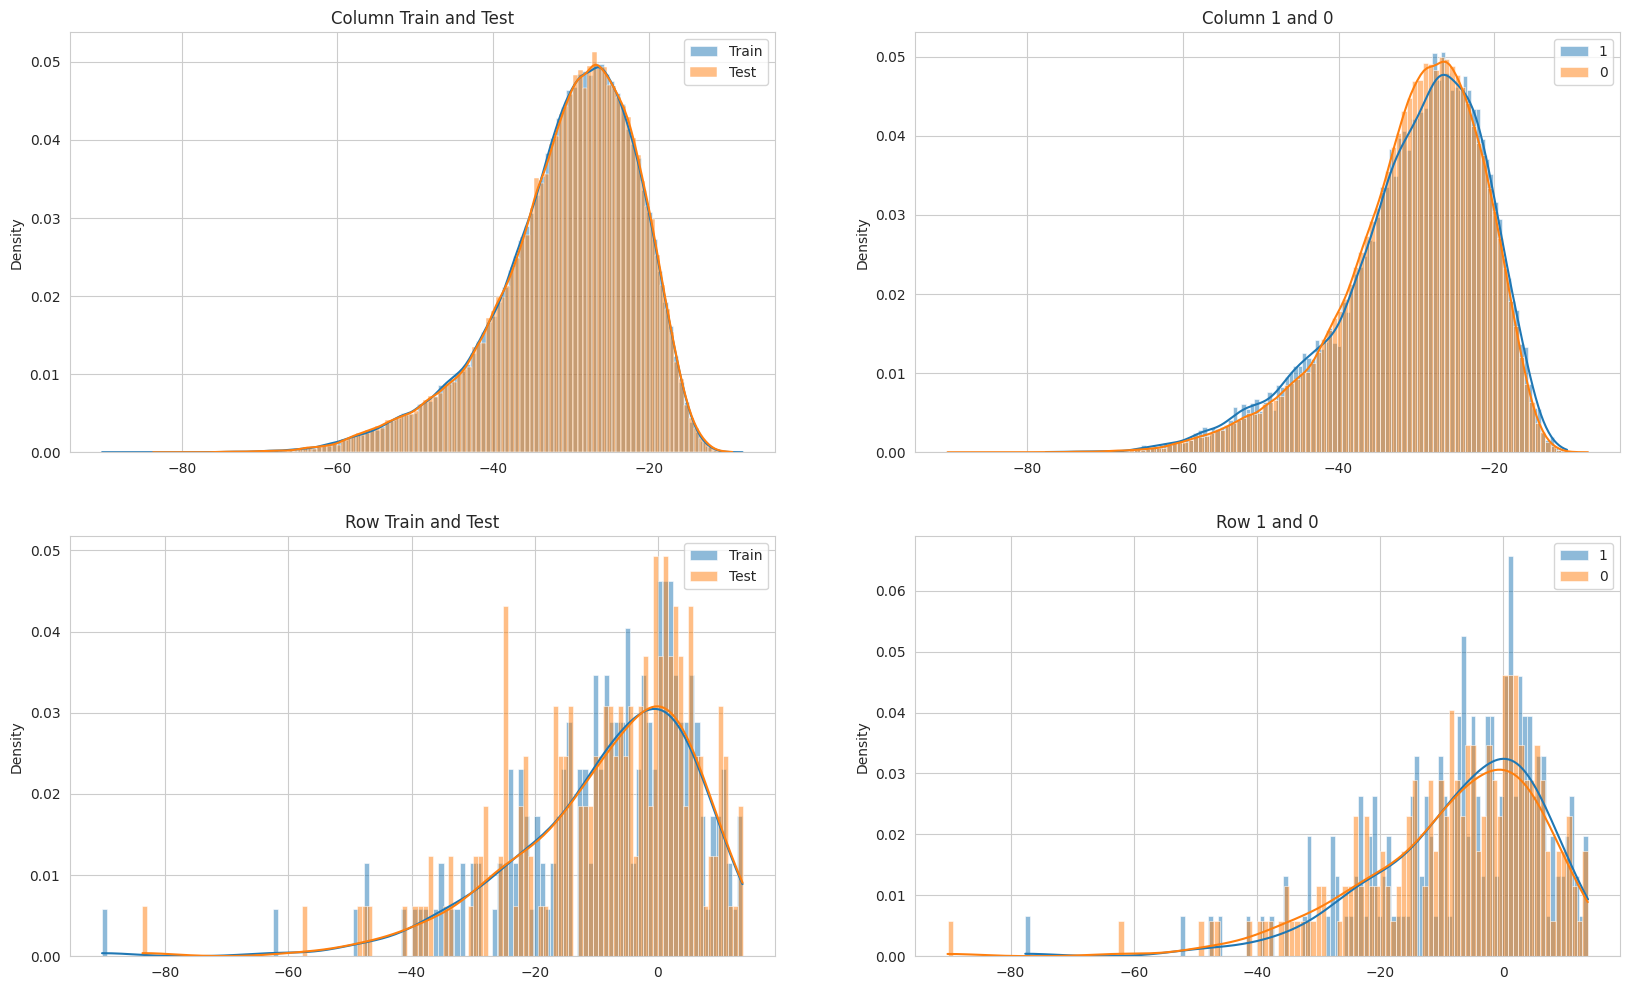

In [20]:
plt.figure()
fig,ax = plt.subplots(2,2,figsize=(20,12))
features = train_df.columns.values[2:202]
plt.subplot(2,2,1)
plt.title('Column Train and Test')
sns.histplot(data = train_df[features].min(axis = 1), label = 'Train', kde = True,bins=120,stat="density")
sns.histplot(data = test_df[features].min(axis = 1), label = 'Test', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,2)
plt.title('Column 1 and 0')
sns.histplot(data = t1[features].min(axis = 1), label = '1', kde = True,bins=120,stat="density")
sns.histplot(data = t0[features].min(axis = 1), label = '0', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,3)
plt.title('Row Train and Test')
sns.histplot(data = train_df[features].min(axis = 0), label = 'Train', kde = True,bins=120,stat="density")
sns.histplot(data = test_df[features].min(axis = 0), label = 'Test', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,4)
plt.title('Row 1 and 0')
sns.histplot(data = t1[features].min(axis = 0), label = '1', kde = True,bins=120,stat="density")
sns.histplot(data = t0[features].min(axis = 0), label = '0', kde = True,bins=120,stat="density")
plt.legend()
plt.show()

### Max

<Figure size 640x480 with 0 Axes>

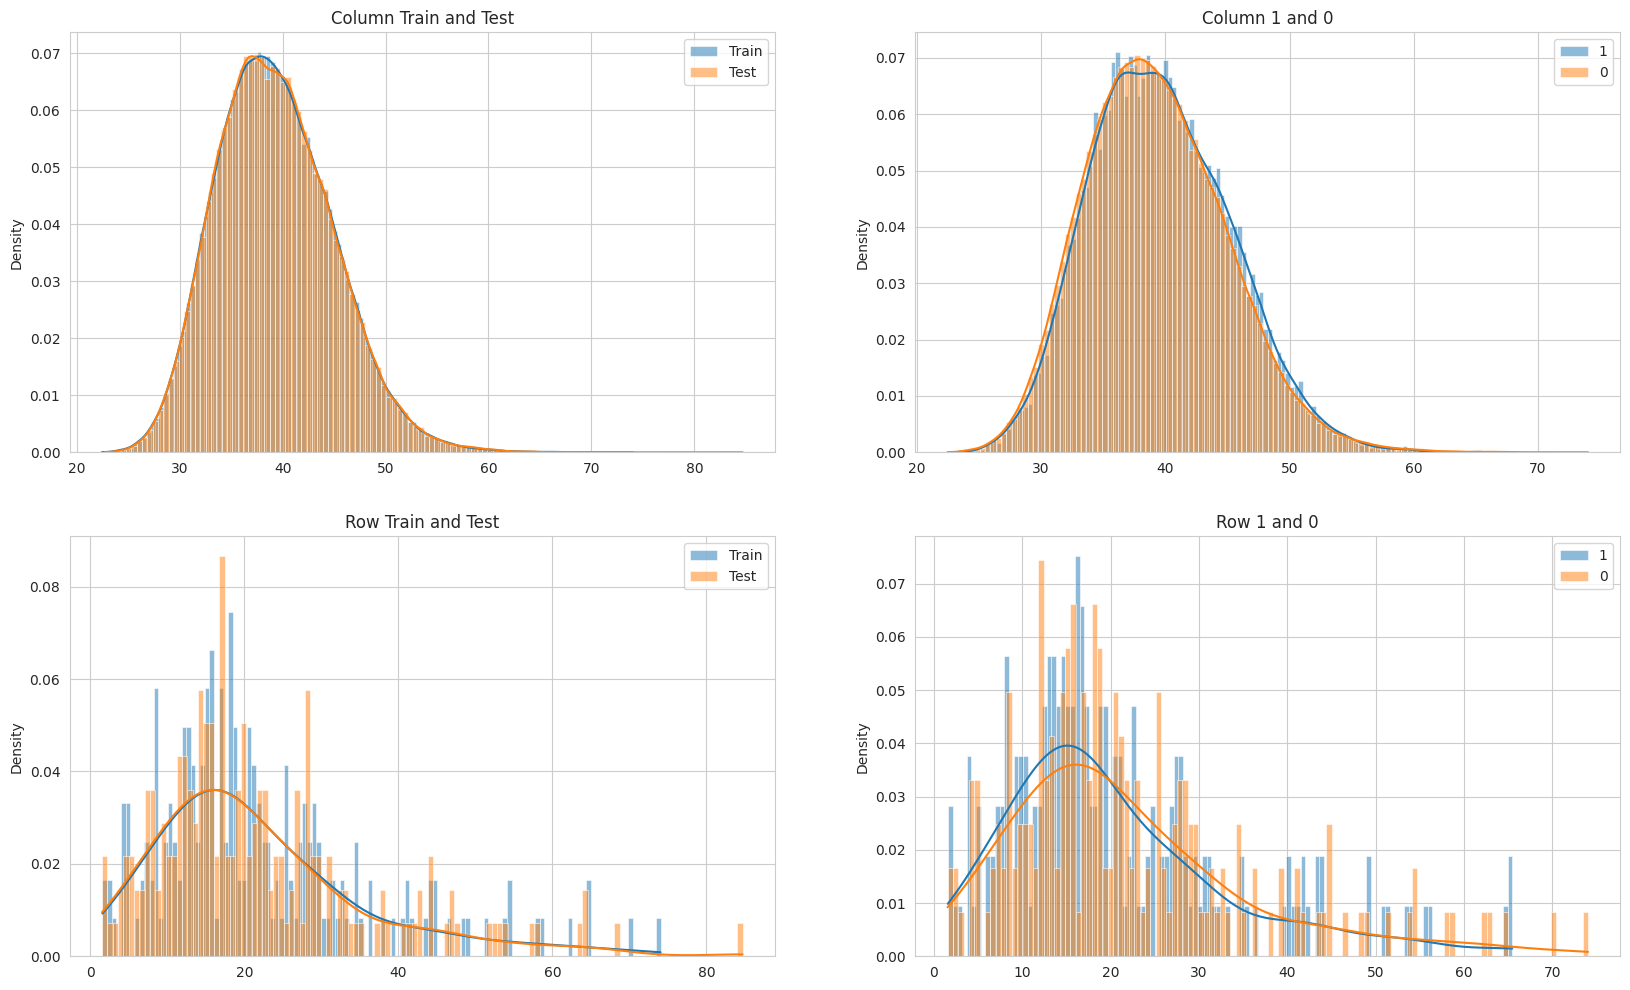

In [21]:
plt.figure()
fig,ax = plt.subplots(2,2,figsize=(20,12))
features = train_df.columns.values[2:202]
plt.subplot(2,2,1)
plt.title('Column Train and Test')
sns.histplot(data = train_df[features].max(axis = 1), label = 'Train', kde = True,bins=120,stat="density")
sns.histplot(data = test_df[features].max(axis = 1), label = 'Test', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,2)
plt.title('Column 1 and 0')
sns.histplot(data = t1[features].max(axis = 1), label = '1', kde = True,bins=120,stat="density")
sns.histplot(data = t0[features].max(axis = 1), label = '0', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,3)
plt.title('Row Train and Test')
sns.histplot(data = train_df[features].max(axis = 0), label = 'Train', kde = True,bins=120,stat="density")
sns.histplot(data = test_df[features].max(axis = 0), label = 'Test', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,4)
plt.title('Row 1 and 0')
sns.histplot(data = t1[features].max(axis = 0), label = '1', kde = True,bins=120,stat="density")
sns.histplot(data = t0[features].max(axis = 0), label = '0', kde = True,bins=120,stat="density")
plt.legend()
plt.show()

### Skew

<Figure size 640x480 with 0 Axes>

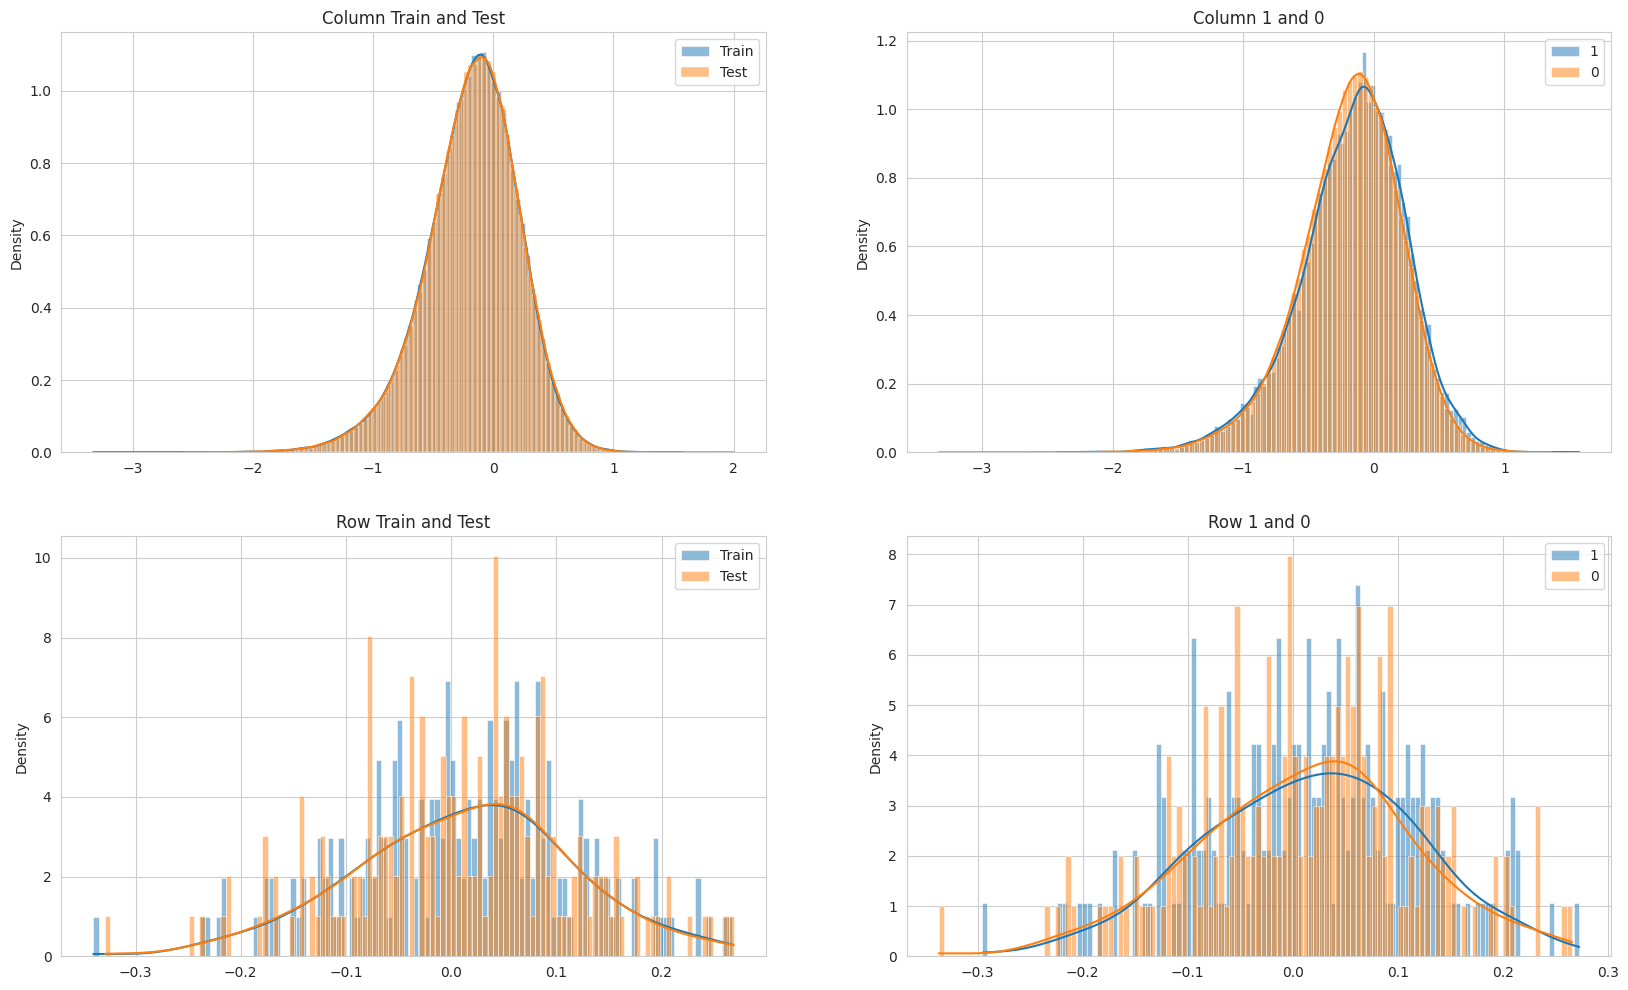

In [22]:
plt.figure()
fig,ax = plt.subplots(2,2,figsize=(20,12))
features = train_df.columns.values[2:202]
plt.subplot(2,2,1)
plt.title('Column Train and Test')
sns.histplot(data = train_df[features].skew(axis = 1), label = 'Train', kde = True,bins=120,stat="density")
sns.histplot(data = test_df[features].skew(axis = 1), label = 'Test', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,2)
plt.title('Column 1 and 0')
sns.histplot(data = t1[features].skew(axis = 1), label = '1', kde = True,bins=120,stat="density")
sns.histplot(data = t0[features].skew(axis = 1), label = '0', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,3)
plt.title('Row Train and Test')
sns.histplot(data = train_df[features].skew(axis = 0), label = 'Train', kde = True,bins=120,stat="density")
sns.histplot(data = test_df[features].skew(axis = 0), label = 'Test', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,4)
plt.title('Row 1 and 0')
sns.histplot(data = t1[features].skew(axis = 0), label = '1', kde = True,bins=120,stat="density")
sns.histplot(data = t0[features].skew(axis = 0), label = '0', kde = True,bins=120,stat="density")
plt.legend()
plt.show()

### Kurtosis

<Figure size 640x480 with 0 Axes>

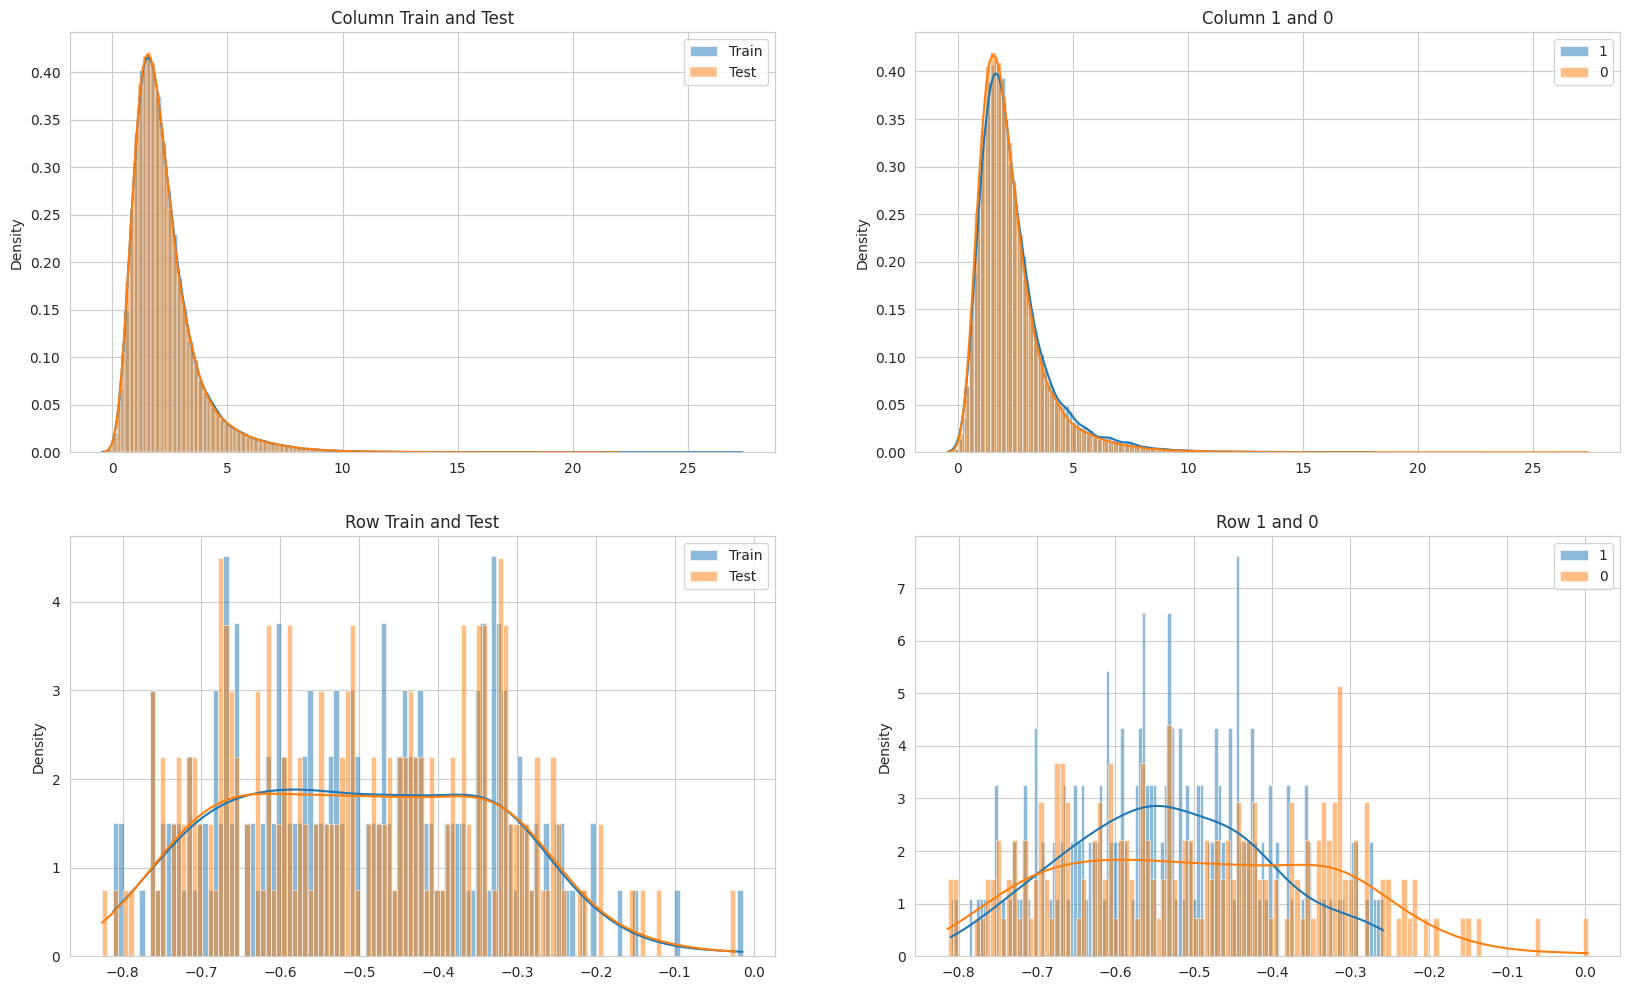

In [23]:
plt.figure()
fig,ax = plt.subplots(2,2,figsize=(20,12))
features = train_df.columns.values[2:202]
plt.subplot(2,2,1)
plt.title('Column Train and Test')
sns.histplot(data = train_df[features].kurtosis(axis = 1), label = 'Train', kde = True,bins=120,stat="density")
sns.histplot(data = test_df[features].kurtosis(axis = 1), label = 'Test', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,2)
plt.title('Column 1 and 0')
sns.histplot(data = t1[features].kurtosis(axis = 1), label = '1', kde = True,bins=120,stat="density")
sns.histplot(data = t0[features].kurtosis(axis = 1), label = '0', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,3)
plt.title('Row Train and Test')
sns.histplot(data = train_df[features].kurtosis(axis = 0), label = 'Train', kde = True,bins=120,stat="density")
sns.histplot(data = test_df[features].kurtosis(axis = 0), label = 'Test', kde = True,bins=120,stat="density")
plt.legend()
plt.subplot(2,2,4)
plt.title('Row 1 and 0')
sns.histplot(data = t1[features].kurtosis(axis = 0), label = '1', kde = True,bins=120,stat="density")
sns.histplot(data = t0[features].kurtosis(axis = 0), label = '0', kde = True,bins=120,stat="density")
plt.legend()
plt.show()

## **Check Data**

### Check Balance

<Axes: xlabel='target', ylabel='count'>

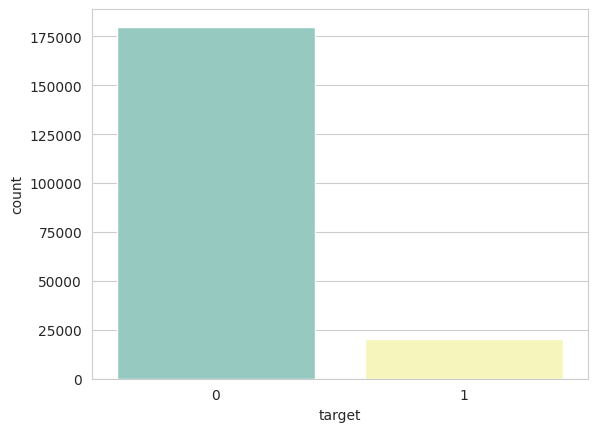

In [24]:
sns.countplot(x="target",data = train_df, palette='Set3')

### Check Duplicates

In [25]:
features = train_df.columns.values[2:202]
max_train = []
max_test = []
for i in features:
    frequency = train_df[i].value_counts()
    max_train.append([i,frequency.max(),frequency.idxmax()])
    frequency = test_df[i].value_counts()
    max_test.append([i,frequency.max(),frequency.idxmax()])
max_train = pd.DataFrame(max_train,columns=["feature","max dup","value"]).sort_values(by="max dup",ascending=False)
max_test = pd.DataFrame(max_test,columns=["feature","max dup","value"]).sort_values(by="max dup",ascending=False)


In [26]:
max_train.head(10)

feature  max dup    value
68    var_68     1084   5.0214
108  var_108      313  14.1999
126  var_126      305  11.5356
12    var_12      203  13.5545
91    var_91       66   6.9919
103  var_103       61   1.6662
148  var_148       59   4.0456
71    var_71       54   0.7031
161  var_161       52   5.7688
25    var_25       41  13.6723

In [27]:
max_test.head(10)

feature  max dup    value
68    var_68     1104   5.0197
126  var_126      307  11.5357
108  var_108      302  14.1999
12    var_12      188  13.5546
91    var_91       86   6.9939
103  var_103       78   1.4659
148  var_148       74   4.0004
161  var_161       69   5.7114
25    var_25       60  13.5965
71    var_71       60   0.5389

# **Feature Engineering**

## **Correlation**

In [28]:
corr = train_df[features].corr().abs().unstack().sort_values().reset_index()
corr = corr[corr['level_0'] != corr['level_1']]

In [29]:
corr.head()

level_0  level_1             0
0  var_191   var_75  2.703975e-08
1   var_75  var_191  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07

In [30]:
corr.tail()

level_0  level_1         0
39795   var_81  var_165  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798  var_139   var_26  0.009844
39799   var_26  var_139  0.009844

## **Make Features**

In [31]:
features = train_df.columns.values[2:202]
for df in [train_df, test_df]:
    df['sum'] = df[features].sum(axis=1)
    df['mean'] = df[features].mean(axis=1)
    df['min'] = df[features].min(axis=1)
    df['max'] = df[features].max(axis=1)
    df['std'] = df[features].std(axis=1)
    df['kurt'] = df[features].kurtosis(axis=1)
    df['skew'] = df[features].skew(axis=1)

In [32]:
train_df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_197  var_198  var_199        sum      mean      min  \
0  18.6266  ...   8.5635  12.7803  -1.0914  1456.3182  7.281591 -21.4494   
1  16.5338  ...   8.7889  18.3560   1.9518  1415.3636  7.076818 -47.3797   
2  14.6155  ...   8.2675  14.7222   0.3965  1240.8966  6.204483 -22.4038   
3  14.9250  ...  10.2922  17.9697  -8.9996  1288.2319  6.441159 -35.1659   
4  19.2514  ...   9.5031  17.9974  -8.8104  1354.2310  6.771155 -65.4863   

       max        std      kurt      skew  
0  43.1127   9.331540  1.331023  0.101580  
1  40.5632  10.336130  4.110215 -0.351734  
2  33.8820   8.753387  0.546438 -0.056957  
3  38.1015   9.594064  2.630499 -0.480116  
4  41.1037  11.287122  9.787399 -1.463426  

[5 rows x 209 columns]

In [33]:
test_df.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_197  var_198  var_199        sum      mean  \
0  18.2675  2.1337  ...  10.7200  15.4722  -8.7197  1416.6404  7.083202   
1  18.6316 -4.4131  ...   9.8714  19.1293 -20.9760  1249.6860  6.248430   
2  20.2537  1.5233  ...   7.0618  19.8956 -23.1794  1430.2599  7.151299   
3  20.5660  3.3755  ...   9.2295  13.0168  -4.2108  1411.4447  7.057223   
4  10.6048  2.9890  ...   7.2882  13.9260  -9.1846  1423.7364  7.118682   

       min      max        std      kurt      skew  
0 -31.9891  42.0248   9.910632  1.871262 -0.088518  
1 -41.1924  35.6020   9.541267  3.391068 -0.559785  
2 -34.3488  39.3654   9.967466  2.326901 -0.135084  
3 -21.4797  40.3383   8.257204  2.253054 -0.167741  
4 -24.8254  45.5510  10.043542  2.044943  0.293484  

[5 rows x 208 columns]

# **Model**

In [34]:
features = train_df.columns.values[2:]
target = train_df['target']

In [35]:
label = 'target' 
metric = 'roc_auc'  

predictor = TabularPredictor(label=label, eval_metric=metric).fit(
    train_data=train_df,
    presets='best_quality',
    time_limit=3600
)

No path specified. Models will be saved in: "AutogluonModels/ag-20260115_040039"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Sep 27 10:16:09 UTC 2025
CPU Count:          4
Pytorch Version:    2.6.0+cu124
CUDA Version:       12.4
GPU Memory:         GPU 0: 15.89/15.89 GB
Total GPU Memory:   Free: 15.89 GB, Allocated: 0.00 GB, Total: 15.89 GB
GPU Count:          1
Memory Avail:       28.51 GB / 31.35 GB (91.0%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True

# **Evaluation**

In [36]:
predictor.leaderboard(train_df, silent=True)
predictions = predictor.predict_proba(test_df)[1]

# **Submission**

In [54]:
submission = pd.DataFrame({
    'ID_code': test_df['ID_code'],
    'target': predictions
})

In [55]:
submission['target'] = round(submission['target']).astype(int)
submission.head()

ID_code  target
0  test_0       0
1  test_1       0
2  test_2       0
3  test_3       0
4  test_4       0

<Axes: xlabel='target', ylabel='count'>

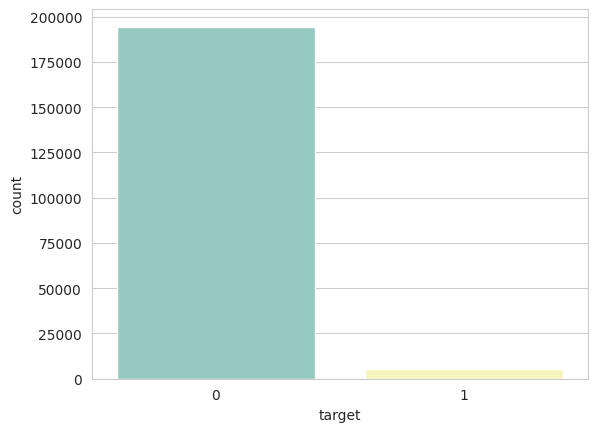

In [59]:
sns.countplot(x="target",data = submission, palette='Set3')

In [56]:
submission.to_csv('submission.csv', index=False)